In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/netflix_titles.csv', encoding='ISO-8859-1')


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

# Get a summary of the dataframe
print(df.info())

# Get statistical summaries of the numerical columns
print(df.describe())


In [ ]:
# Check for missing values
print(df.isnull().sum())


In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Drop columns with any missing values
df.dropna(axis=1, inplace=True)


In [ ]:
# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Fill missing values with the median of the column
df.fillna(df.median(), inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset with a different encoding if needed
df = pd.read_csv('/content/netflix_titles.csv', encoding='ISO-8859-1')

# Initial data exploration
print(df.head())
print(df.info())
print(df.describe())

# Handling missing values
# For simplicity, let's fill missing values with appropriate methods
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Assuming release_year is in the dataset, if not extract it from the 'release_year' column
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Feature engineering
# Example: creating a new feature indicating how many years ago the content was added
df['years_since_added'] = 2024 - df['release_year']  # Adjust the current year accordingly

# Log transformation (example, not necessarily applicable here)
# df['log_duration'] = np.log1p(df['duration'])

# Binning release year into categories (example)
df['release_year_binned'] = pd.cut(df['release_year'], bins=[1900, 2000, 2010, 2020, 2024], labels=['1900s', '2000s', '2010s', '2020s'])

# Normalization or standardization of numerical features
# Here, we assume you want to normalize 'release_year' and 'years_since_added'
scaler = StandardScaler()
df[['release_year', 'years_since_added']] = scaler.fit_transform(df[['release_year', 'years_since_added']])

# Selecting only the relevant columns for final output
df = df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']]

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

# Display the cleaned dataframe
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

<ipython-input-10-1c7c1b1dd8a8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


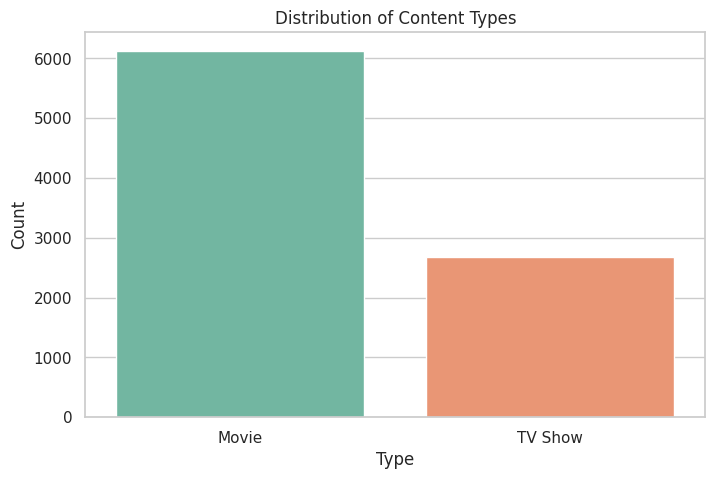

<ipython-input-10-1c7c1b1dd8a8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set3')


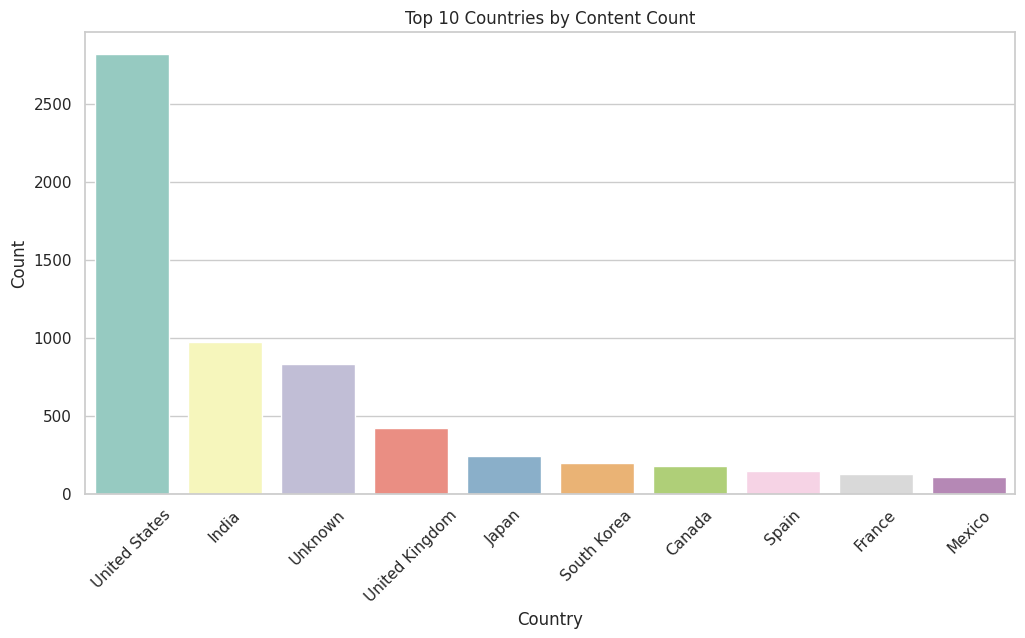

<ipython-input-10-1c7c1b1dd8a8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='Set1', order=df['rating'].value_counts().index)


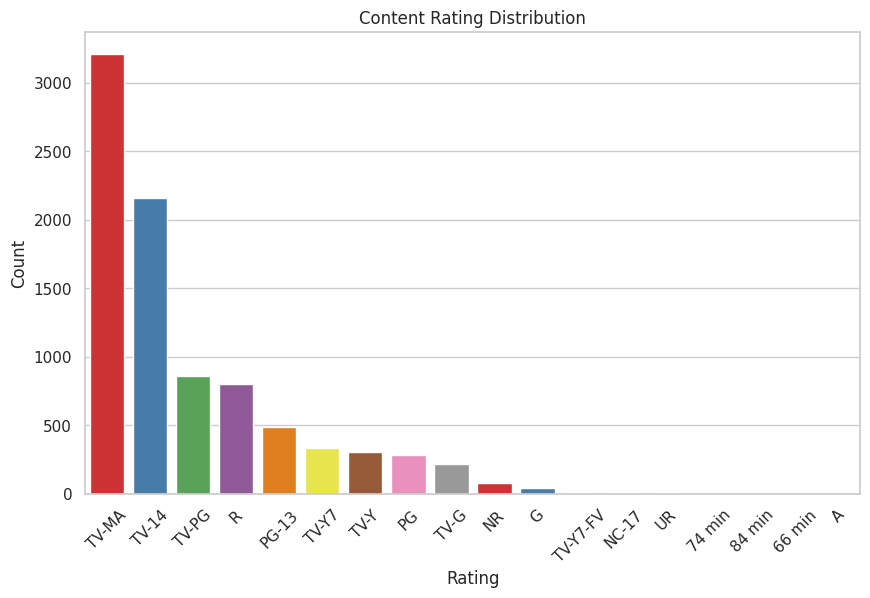

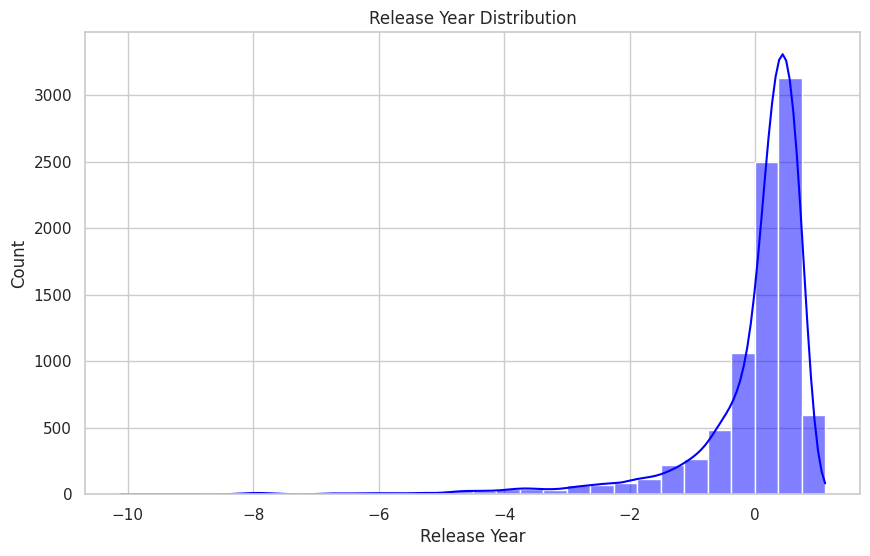

<ipython-input-10-1c7c1b1dd8a8>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='Set2')


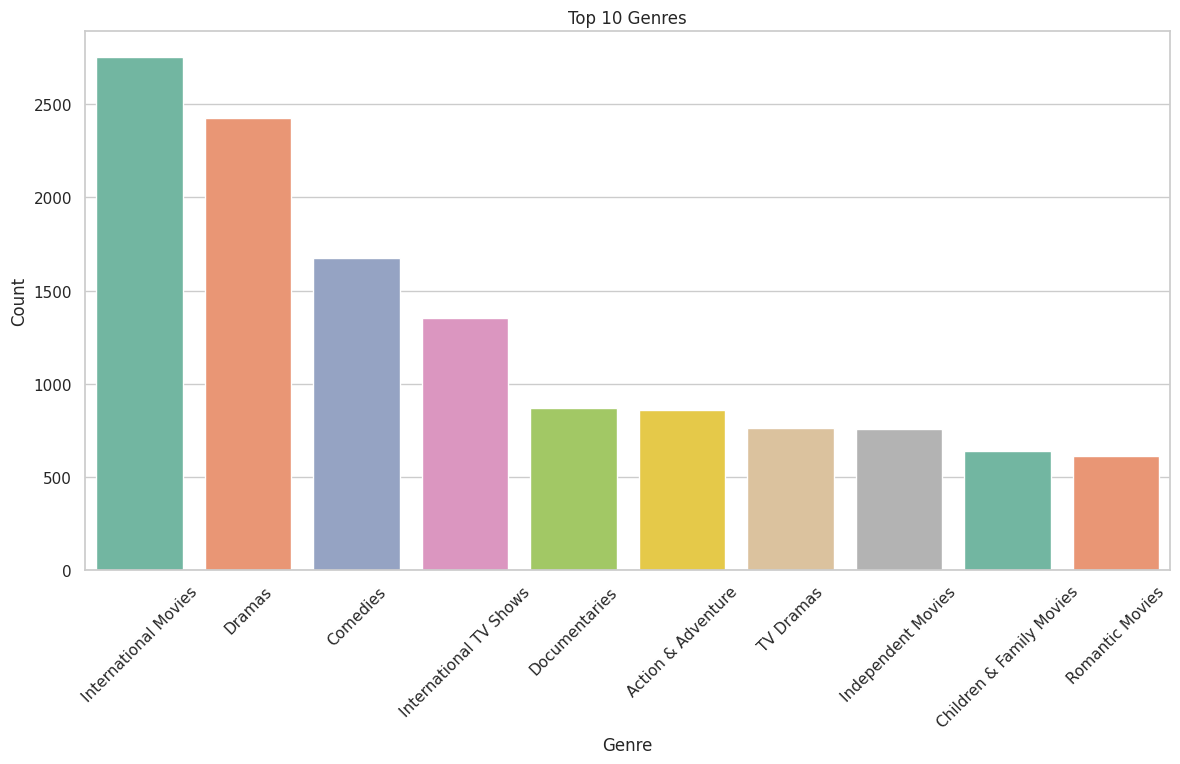

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Set the style of the visualizations
sns.set(style="whitegrid")

# 1. Distribution of Content Types
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Top 10 Countries by Content Count
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set3')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Content Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='Set1', order=df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Release Year Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# 5. Top 10 Genres
plt.figure(figsize=(14, 7))
# Split the 'listed_in' column into multiple rows
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Set2')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
